In [1]:
import psycopg2

In [2]:
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [3]:
conn = psycopg2.connect(database="postgres", user="postgres", password="", host='db')

In [4]:
cur = conn.cursor()

In [5]:
cur.execute("create extension if not exists rdkit")

In [6]:
cur.execute("drop table if exists test_compound ")

In [7]:
cur.execute("create table test_compound(compound_id text primary key, mol mol, smiles text)")

In [8]:
for i in range(5):
    smi = "C" * i + "O"
    cur.execute('INSERT INTO test_compound(compound_id, mol, smiles) VALUES (%s, mol_from_smiles(%s), %s)', (str(i), smi, smi))

In [9]:
cur.close()

In [10]:
conn.commit()

In [11]:
cur = conn.cursor()

In [12]:
cur.execute("select compound_id, mol_to_pkl(mol), smiles from test_compound")

In [13]:
from rdkit import Chem

In [14]:
mols = [Chem.Mol(rcd[1].tobytes()) for rcd in cur.fetchall()]    

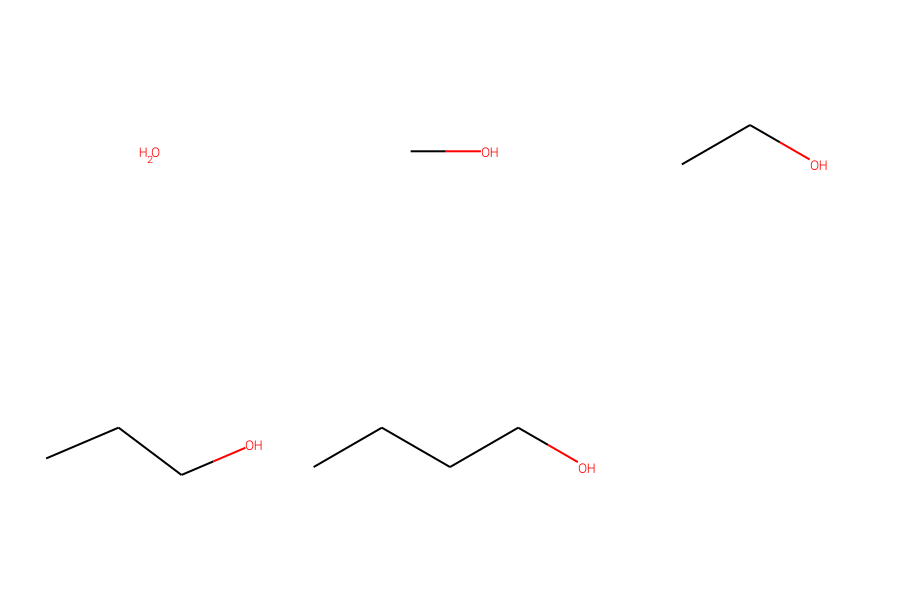

In [15]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300))

In [16]:
cur.execute("drop table test_compound")

In [17]:
cur.close()

In [18]:
conn.close()